**Escuela de Ingeniería en Computación**

**IC6200 - Inteligencia Artificial - Proyecto 1 - Machine Learning**

**Estudiantes:**

Gerald Núñez Chavarría, Sebastián Arroniz, Sebastián Bérmudez.

**Profesor:**

Kenneth Obando Rodríguez

**Fecha de entrega:**

26/04/2024

## **1. Entendimiento del Negocio**
A continuación se presentan el objetivo del negocio y los objetivos de la aplicación de la minería de datos en este proyecto de machine-learning, el cuál esta basado en el set de datos llamado "Costa Rican Household Poverty Level Prediction". 
### **1.1 Objetivo del Negocio**
**Objetivo 1:** El principal objetivo del negocio es mejorar la precisión de la clasificación de hogares en niveles de pobreza utilizando modelos de machine learning, lo que permitirá a las agencias dirigir de manera más efectiva los recursos hacia quienes más lo necesitan.

**Criterio de éxito:** El modelo predice el 90% de los casos de manera correcta. 

### **1.2 Objetivo de la Minería de Datos**

**Objetivo 1:** Limpieza y preparación de datos: Preparar el conjunto de datos "Costa Rican Household Poverty Level Prediction" para su análisis y modelado, eliminando valores atípicos, tratando los valores faltantes y transformando variables según sea necesario. **Criterio de éxito:** Lograr un conjunto de datos limpio y completo listo para su análisis, con menos del 10% de datos faltantes y variables transformadas de manera adecuada. 

**Objetivo 2:** Análisis exploratorio de datos: Realizar un análisis exploratorio de los datos para comprender la distribución de las variables, identificar posibles relaciones y determinar la relevancia de las características para la predicción del nivel de pobreza del hogar. **Criterio de éxito:** Identificación de al menos X variables con alta correlación con el nivel de pobreza del hogar, y comprensión clara de la distribución de las características en el conjunto de datos.

**Objetivo 3:** Seleccionar y entrenar un modelo de clasificación/regresión que brinde una mayor precisión para la predicción del nivel de pobreza. **Criterio de éxito:** El modelo predice al menos un X% y se valida mediante la técnica "cross validation". 

## **2. Entendimientos de los Datos**

A continuación, se presenta la fuente de los datos, se seleccionan variables importantes, se realizan ajustes y se verifica la calidad. 

### **2.1 Recolección Inicial de Datos.**

Se obtiene el set de datos llamado `train.csv` del reto "Costa Rican Household Level Prediction" en el siguiente link: https://www.kaggle.com/competitions/costa-rican-household-poverty-prediction/data. El archivo se guarda en el directorio `docs/data`.

In [2]:
import pandas as pd

# read train data creating a pandas data frame
df_train = pd.read_csv('../docs/data/train.csv')


Para verificar que la lectura de datos fue exitosa podemos llamar a la función `.head()` del dataframe. 

In [3]:
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


### **2.2 Descripción de los Datos**

En esta sección simplemente se presentan características generales de los datos. Primero, obtengamos la cantidad de filas y de columnas:

In [4]:
df_train.shape

(9557, 143)

Se puede observar que son 9957 filas y 143 columnas. Podemos obtener más detalles utilzando la función `info()`. 

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


Las filas empiezan desde la 0 y llegan hasta la 9556. Las columnas empiezan desde Id y llegan hasta Target. Los tipos de datos son flotantes(8), enteros(130) y objetos(5).

Durante este cuaderno, se nombran y definen algunas variables, no obstante, si quiere observar el nombre y significado de las 143 variables ingrese al sitio de Kaggle https://www.kaggle.com/competitions/costa-rican-household-poverty-prediction/data.

### **2.3 Exploración de los Datos**
Se seleccionan las siguientes seis variables: `rooms`, `escolari`, `hogar_total`, `age`, `overcrowding`, `Target`. El objetivo es explorar los datos más a profundidad mediante esta muestra de variables, que el motivo de su elección se debe a al potencial que presentan para poder clasificar el estado económico de los hogares. Por ejemplo, `rooms` podría estar relacionada con el tamaño de la vivienda y, por lo tanto, con las condiciones de vida, mientras que `escolari` (años de escolaridad) podría estar relacionada con el nivel educativo de los miembros del hogar, lo cual es un factor importante en el desarrollo y la movilidad económica. `hogar_total` (número total de personas en el hogar) y `age` (edad) también podrían proporcionar información importante sobre la composición y la demografía del hogar. `overcrowding` (sobrepoblación) es otra variable que podría indicar condiciones de vida inadecuadas si hay demasiadas personas por habitación en el hogar. Por último la variable objetivo `Target` que viene en el set de datos de entrenamiento y es una clasificación ordinal de cada fila con los siguientes valores:

1 = pobreza extrema

2 = pobreza moderada

3 = hogares vulnerables

4 = hogares no vulnerables. 

Ahora, apliquemos a estas variables la función `describe()` que permite obtener estadísticas de los datos en estas variables. Las estadíscticas que se obtienen son: Cuenta el número de observaciones no NA/nulas (`count`), el máximo de los valores del objeto (`max`), el mínimo de los valores del objeto(`min`), la media de los valores (`mean`) y la desviación estándar de las observaciones (`std`).

In [5]:
# Select the variables for the data frame and apply describe
df_main_variables = df_train[['rooms', 'escolari', 'hogar_total', 'age', 'overcrowding', 'Target']]
df_main_variables.describe()

,rooms,escolari,hogar_total,age,overcrowding,Target
count,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,4.955530,7.200272,3.999058,34.303547,1.605380,3.302292
std,1.468381,4.730877,1.772216,21.612261,0.819946,1.009565
min,1.000000,0.000000,1.000000,0.000000,0.200000,1.000000
25%,4.000000,4.000000,3.000000,17.000000,1.000000,3.000000
50%,5.000000,6.000000,4.000000,31.000000,1.500000,4.000000
75%,6.000000,11.000000,5.000000,51.000000,2.000000,4.000000
max,11.000000,21.000000,13.000000,97.000000,6.000000,4.000000


Analizando cada variable con el objetivo de ir obteniendo información valiosa de los datos:

1. **rooms (número de habitaciones):**
   - La media de 4.96 habitaciones sugiere que, en promedio, las viviendas tienen alrededor de 5 habitaciones.
   - La desviación estándar relativamente baja de 1.47 indica que la cantidad de habitaciones tiende a variar poco entre las viviendas.
   - La distribución muestra que el mínimo es 1 habitación y el máximo es 11 habitaciones, lo que sugiere una variedad en el tamaño de las viviendas dentro de la muestra.

2. **escolari (años de escolaridad):**
   - La media de 7.20 años de escolaridad indica que, en promedio, las personas en los hogares tienen poco más de 7 años de educación formal.
   - La desviación estándar de 4.73 muestra una variabilidad relativamente alta en el nivel educativo de la muestra.
   - La mínima de 0 años sugiere que hay personas sin educación formal en la muestra, mientras que la máxima de 21 años indica que algunas personas tienen educación universitaria o superior.

3. **hogar_total (número total de personas en el hogar):**
   - La media de aproximadamente 4 personas por hogar sugiere que, en promedio, los hogares tienen alrededor de 4 miembros.
   - La desviación estándar de 1.77 indica cierta variabilidad en el tamaño de los hogares.
   - La distribución muestra que el tamaño mínimo del hogar es 1 persona y el máximo es 13 personas, lo que sugiere una amplia gama de tamaños de hogar en la muestra.

4. **age (edad):**
   - La media de 34.30 años indica que la edad promedio en la muestra es de alrededor de 34 años.
   - La desviación estándar de 21.61 muestra una variabilidad considerable en las edades de la muestra.
   - La mínima de 0 años podría indicar la presencia de bebés o niños muy pequeños en algunos hogares, mientras que la máxima de 97 años sugiere la presencia de personas mayores.

5. **overcrowding (sobrepoblación):**
   - La media indica que hay alrededor de 1.6 personas por habitación en los hogares de la muestra.
   - La desviación estándar de 0.82 sugiere cierta variabilidad en la sobrepoblación entre los hogares.
   - La distribución muestra que el mínimo es 0.2 personas por habitación y el máximo es 6 personas por habitación, lo que indica una variedad en las condiciones de vida dentro de la muestra.

6. **Target (variable objetivo):**
   - La media de 3.30 indica que el nivel promedio de la variable objetivo es de alrededor de 3, lo que sugiere que la mayoría de los hogares se encuentran en la categoría de "hogares vulnerables".
   - La desviación estándar de 1.01 indica que, en promedio, los valores de Target tienden a desviarse en aproximadamente 1 punto de la media.
   - El valor mínimo de 1 y el valor máximo de 4 indican la presencia de hogares en todas las categorías de pobreza y vulnerabilidad.

Se realiza un histograma para cada una de las variables, con el objetivo de visualizar graficamente lo ya analizado sobre la distribución de cada variable. 

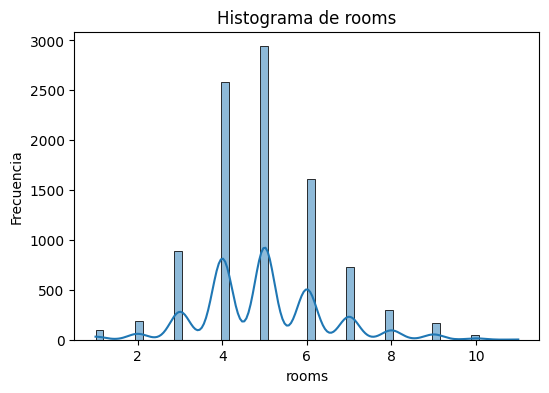

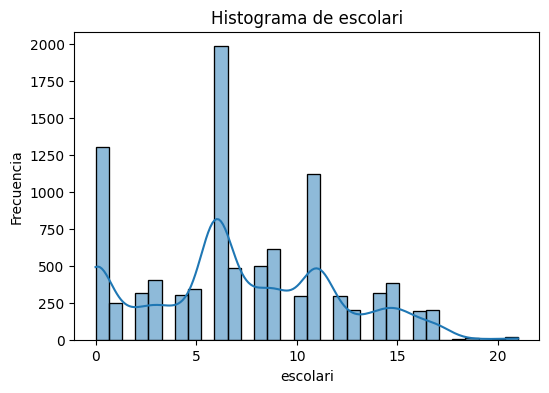

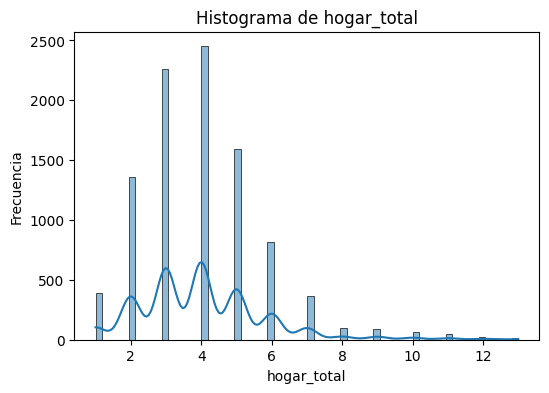

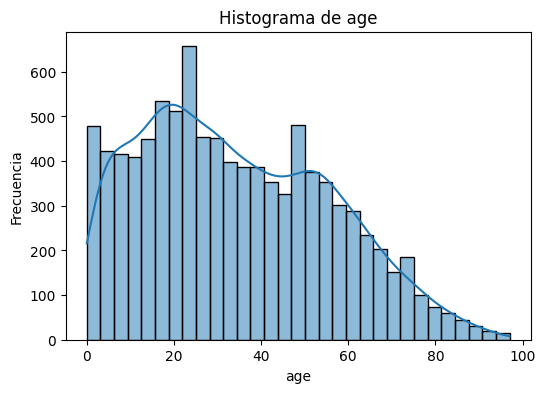

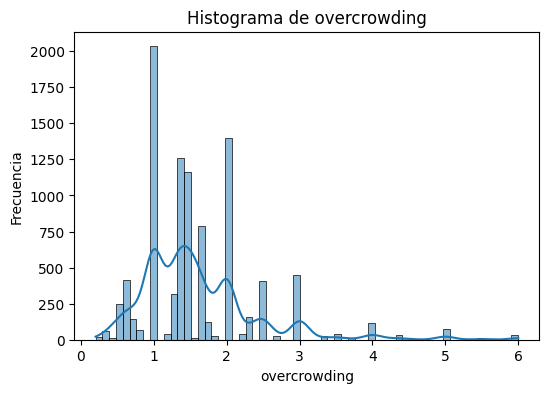

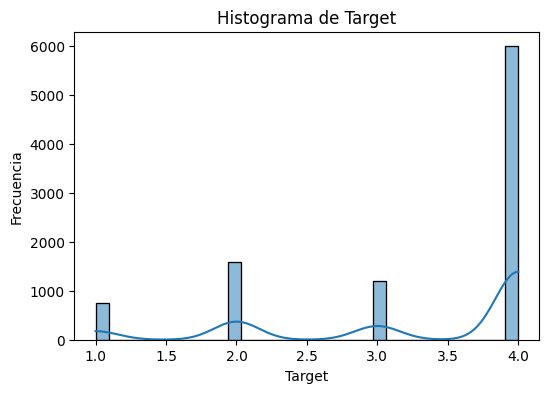

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selected variables
main_variables = ['rooms', 'escolari', 'hogar_total', 'age', 'overcrowding', 'Target']

# Generate histogram for each variable
for variable in main_variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_main_variables[variable], kde=True)
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

Para obtener aún más información, podemos crear un diagrama de pares:

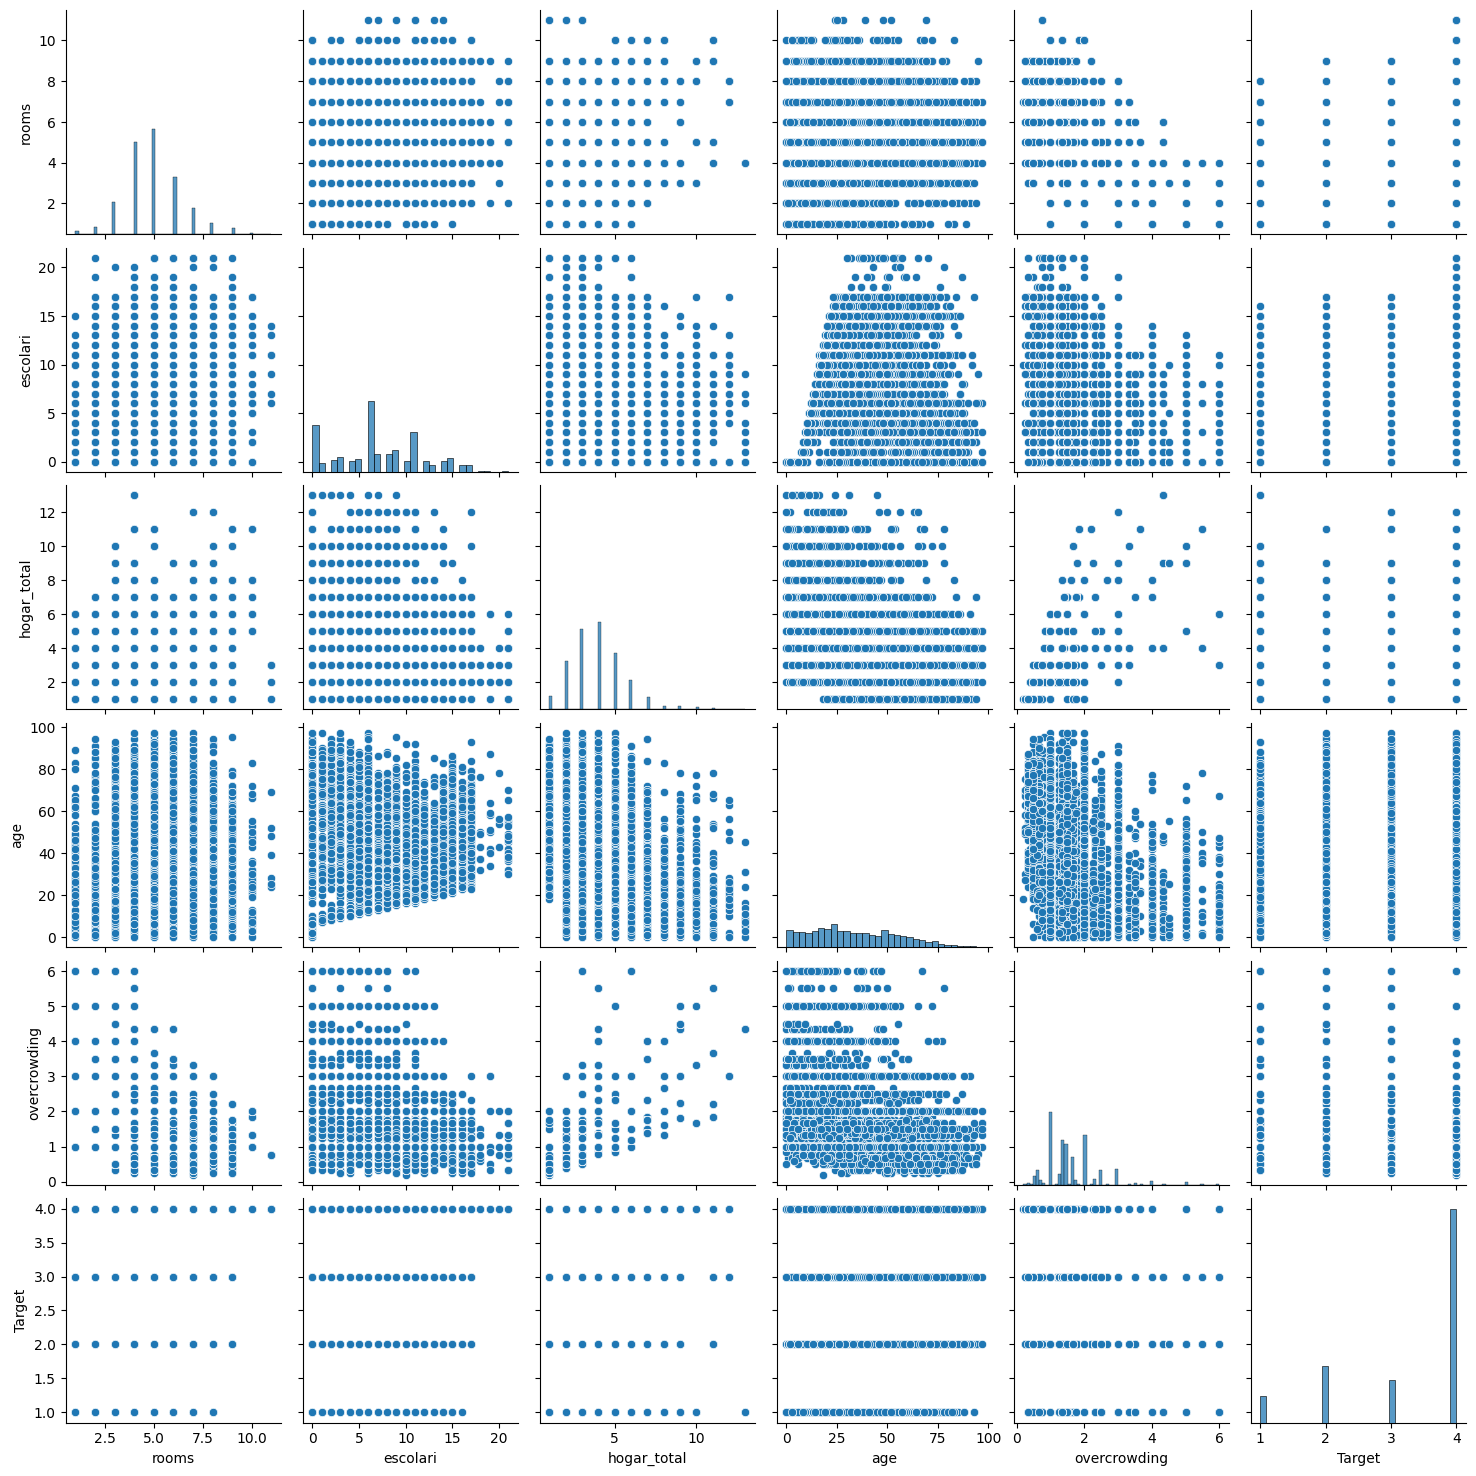

In [7]:
# Create a representation of relation between variables
sns.pairplot(df_main_variables[main_variables])
plt.show()

Se pueden realizar apreciaciones importantes, cómo el hecho de que entre más escolaridad (`escolari`), menos sobre población por habitación (`overcrowding`). 

### **2.4 Calidad de los Datos**

Es importante revisar la calidad de los datos, ya que si "**entra basura, sale basura**". Lo primero que haremos, es verificar cuántos valores NaN existen sumando la cantidad de estos valores en las columnas que los tienen. Hay que tener en cuenta que la función `isnull()` únicamente cuenta los valores que son NaN indicados explicitamente o vacíos. Es decir, si se utiliza un código cómo por ejemplo `-1` para indicar que no se cuenta con el dato, entonces no nos dariamos cuenta.

In [5]:
# Count all null values for colums and show the colums with null values
missing_values = df_train.isnull().sum()
print(missing_values[missing_values != 0])

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64


Se puede observar que de las 143 columnas del set de datos de entrenamiento únicamente 5 son afectadas por datos nulos o vacíos. Sin embargo, en las primeras tres filas la cantidad de datos faltantes o nulos es mayor al 60% de las 9557 columnas del set de datos, lo cuál puede afectar significativamente el modelo al tomar en cuenta estas variables para realizar la clasificación. Se deben tomar desiciones respecto a estas variables en la sección 3. 

También, sería importante observar las variables que pandas identificó cómo tipo objeto:

In [6]:
# Select all columns with 'object' type
columnas_object = df_train.select_dtypes(include=['object']).columns
print(columnas_object)

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


Las variables `Id` y `idhogar`, son simplemente id's. Definamos las otras tres variables: 

`dependency`: Tasa de dependencia, calculada = (número de miembros del hogar menores de 19 años o mayores de 64)/(número de miembros del hogar entre 19 y 64 años)

`edjefe`: años de educación del varón cabeza de familia, basado en la interacción de escolari (años de educación), cabeza de familia y sexo, sí=1 y no=0

`edjefa`: años de educación del cabeza de familia femenino, basado en la interacción de escolari (años de educación), cabeza de familia y sexo, sí=1 y no=0

Sería importante analizar que valores tienen para ver con que se va a entrenar el modelo.

In [7]:
# Verify unique values for object variabes
print(df_train['dependency'].unique())
print(df_train['edjefe'].unique())
print(df_train['edjefa'].unique())

['no' '8' 'yes' '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5'
 '.40000001' '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25'
 '.22222222' '5' '.83333331' '.80000001' '6' '3.5' '1.6666666' '.2857143'
 '1.75' '.71428573' '.16666667' '.60000002']
['10' '12' 'no' '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 'yes' '3' '18' '13' '20']
['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']


Las variables tienen datos que no coinciden con la definición y van a ensuciar el modelo, también se debe sulocionar este problema en la sección 3. 

Por último, se mencionaba en la discusión publicada en la página de Kaggle, que hay algunos hogares que tienen un diferente Target, cuándo deberían estar clasificados bajo uno mismo, comprobemos si es cierto:

In [87]:
household_targets = {} # Dictionary to store the target value for each household ID
conflicting_households = [] # List to store the IDs of households with conflicting target values
for row in df_train.iterrows():
    id_hogar = row[1]['idhogar'] 
    target = row[1]['Target'] 
    if id_hogar in household_targets:
        if household_targets[id_hogar] != target:
            conflicting_households.append(id_hogar)
    else:
        household_targets[id_hogar] = target

len(set(conflicting_households))


85

Cómo se puede observar, hay 85 hogares que tienen conflicto de clasificación dado que tienen un `Target` diferente, esto es un problema que también se debe corregir en la sección 3. 

## **3. Preparación de los Datos**

En esta sección se presenta cómo se seleccionan, limpian, construyen y transforman los datos con el objetivo de obtener un set de datos de una mejor calidad y evitar que entre "basura" en el modelo. 

### **3.1 Selección de los Datos**

Existen columnas que pueden ser eliminadas porqué realmente no aportan un valor al modelo para clasificar el nivel de pobreza. Otras pueden ser eliminadas porqué tienen un valor redundante (otra variable refleja casi lo mismo). Las variables eliminadas serán:

`r4h1`: Males younger than 12 years of age

`r4h2`: Males 12 years of age and older

`r4h3`: Total males in the household

`r4m1`: Females younger than 12 years of age

`r4m2`: Females 12 years of age and older

`r4m3`: Total females in the household

Esto porque no nos aporta nada clasificar esto por género y ya contamos con las siguientes variables:

`r4t1`: persons younger than 12 years of age

`r4t2`: persons 12 years of age and older

`r4t3`: Total persons in the household

Otras variables que se pueden eliminar, son las que su valor es únicamente un cálculo al cuadrado, ya que no nos aporta nada más que obtener el valor de otra variable elevado al cuadrado. Estas son:

`SQBescolari`: escolari squared

`SQBage`: age squared

`SQBhogar_total`: hogar_total squared

`SQBedjefe`: edjefe squared

`SQBhogar_nin`: hogar_nin squared

`SQBovercrowding`: overcrowding squared

`SQBdependency`: dependency squared

`SQBmeaned`: square of the mean years of education of adults (>=18) in the household

`agesq`: Age squared

Serán eliminadas hasta el final ya que pueden ser útiles para corregir algunas otras anomalías en los datos.

### **3.2 Limpieza de los Datos**



A continuación se muestran las columnas que tienen valores NaN o vacíos. Este cálculo ya se hizo, pero refresquemos:

In [16]:
# Count all null values for colums and show the colums with null values
missing_values = df_train.isnull().sum()
print(missing_values[missing_values != 0])

rez_esc      7928
SQBmeaned       5
dtype: int64


Las variables involucradas son: `v2a1`, `v18q1`, `rez_esc`, `meaneduc` y `SQBmeaned`. 

Corrijamos `meaneduc` (`SQBmeaneduc` será eliminada luego, por lo tanto no necesita arreglar los valores), que mide el promedio de educación de los adultos mayores a 18 años en ese hogar. Entonces, observemos cuál es el `idhogar` dónde tenemos un `meaneduc` nulo. 

In [8]:
# Select all hogar id's where meaneduc is equal to NaN (null)
df_train[df_train['meaneduc'].isnull()][['idhogar', 'age', 'escolari', 'meaneduc']]

,idhogar,age,escolari,meaneduc
1291,1b31fd159,18,10,NaN
1840,a874b7ce7,18,6,NaN
1841,a874b7ce7,18,4,NaN
2049,faaebf71a,19,12,NaN
2050,faaebf71a,19,12,NaN


Si hay personas mayores de 18 años en dónde los campos de `meaneduc` son igual a NaN o vacíos. Además, que realmente solo son 3 hogares que tienen este defecto (hay repetidos). Veamos si viven más personas en estos hogares o únicamente las 5 que se muestran en los resultados. 

In [9]:
print(len(df_train[df_train['idhogar'] == df_train.iloc[1291]['idhogar']]))
print(len(df_train[df_train['idhogar'] == df_train.iloc[1840]['idhogar']]))
print(len(df_train[df_train['idhogar'] == df_train.iloc[2049]['idhogar']]))

1
2
2


El resultado es favorable, porqué demuestra que solo estas personas viven en esos hogares lo que facilita rellenar los datos nulos de `meaneduc`. Para el primer hogar (fila 1291) simplemente es sustituir el valor nulo de `meaneduc` por el valor de `escolari` ya que no vive nadie más y ese es el promedio. Para el segundo caso y tercer caso, se toman los valores de escolari de ambas filas y se dividen entre 2, para obtener el promedio de `meaneduc` y rellenar esos valores nulos. 

In [10]:
# First household
escolari_value = df_train.loc[1291, 'escolari']

df_train.loc[1291, 'meaneduc'] = escolari_value

# Second household
escolari_value1 = df_train.loc[1840, 'escolari']
escolari_value2 = df_train.loc[1841, 'escolari']
meaneduc = (escolari_value1 + escolari_value2) / 2

df_train.loc[1840, 'meaneduc'] = meaneduc
df_train.loc[1841, 'meaneduc'] = meaneduc


# Third household
escolari_value1 = df_train.loc[2049, 'escolari']
escolari_value2 = df_train.loc[2050, 'escolari']
meaneduc = (escolari_value1 + escolari_value2) / 2

df_train.loc[2049, 'meaneduc'] = meaneduc
df_train.loc[2050, 'meaneduc'] = meaneduc

# Now we have filled this NaN values. 
print(df_train.loc[[1291, 1840, 1841, 2049, 2050]][['idhogar', 'meaneduc']])

        idhogar  meaneduc
1291  1b31fd159      10.0
1840  a874b7ce7       5.0
1841  a874b7ce7       5.0
2049  faaebf71a      12.0
2050  faaebf71a      12.0


Es turno de arreglar una variable muy importante cómo lo es `v2a1` que hace referencia al pago mensual de renta por mes y tiene 6860 valores pérdidos. No obstante, hay otras variables que hacen referencia al tipo de vivienda, y nos inidican por ejemplo si es casa propia o un lugar precario, entre otros. Demos un vistazo:

In [11]:
no_rent = df_train[df_train['v2a1'].isnull()]
print("Casa propia: ", no_rent[no_rent['tipovivi1']==1]['Id'].count())
print("Es propietario de su casa pagando cuotas: ", no_rent[no_rent['tipovivi2']==1]['Id'].count())
print("Alquila: ", no_rent[no_rent['tipovivi3']==1]['Id'].count())
print("Precario: ", no_rent[no_rent['tipovivi4']==1]['Id'].count())
print("Other: ", no_rent[no_rent['tipovivi5']==1]['Id'].count())
print("Total ", 6860)

Casa propia:  5911
Es propietario de su casa pagando cuotas:  0
Alquila:  0
Precario:  163
Other:  786
Total  6860


De hecho, la mayoría son propietarios de sus casas, sólo unos pocos tienen situaciones extrañas. Probablemente podemos suponer que no pagan alquiler, y poner 0 en estos casos, para no lidiar con los valores NaN o vacíos.

In [12]:
df_train['v2a1'] = df_train['v2a1'].fillna(0)

En cuánto al número de tabletas que posee el hogar (`v18q1`) que tiene 7342 conlumnas nulas, podemos utilizar la variables `v18q` que indica si el hogar posee o no tabletas, podemos inspeccionar a ver si los valores nulos a la vez coinciden con qué el hogar no tiene tabletas. 

In [13]:
# Verifiy if the null values of v18q1 is a consecuence of a 0 (does not have tablets) in v18q
nan_tablet = df_train[df_train['v18q1'].isnull()]
nan_tablet[nan_tablet['v18q']==0]['Id'].count()

7342

Efectivamente, quiere decir que cuándo `v18q1` es nulo es porqué no hay tabletas en el hogar. Entonces podemos cambiar todos los nulos por 0. 

In [14]:
# Fill all nan values for v18q1 with zeros.
df_train['v18q1'] = df_train['v18q1'].fillna(0)

Y la última variable a la que le debemos limpiar sus valores nulos es `rez_esc` que indica la cantidad de años de retraso escolar que lleva una persona y tiene 7928 valores nulos. Cómo no tenemos ninguna pista, primero describamos la variable a ver que podemos observar:

In [17]:
df_train.rez_esc.describe()

count    1629.000000
mean        0.459791
std         0.946550
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: rez_esc, dtype: float64

Se puede apreciar que la mayoría de valores andan entre 0 y 1, recordemos que esto no toma en cuenta los NaN y los vacíos. Pero ahora que sabemos que hay muchos valores entre 0 y 1, observemos cuáles son mayores a 1 y veamos ciertos datos de estas filas con una muestra de 30:

In [27]:
# Select 30 rows where rez_esc > 1 
df_train[df_train['rez_esc'] > 1][['age', 'escolari', 'rez_esc']][:30]

,age,escolari,rez_esc
185,13,3,3.0
190,16,7,2.0
240,16,6,3.0
242,11,2,2.0
312,15,6,2.0
317,17,6,4.0
319,17,7,3.0
320,15,6,2.0
333,16,7,2.0
510,16,7,2.0


La mayoría están en edad de seguir asistiendo al colegio. Entonces observemos lo siguiente:

In [25]:
# Filter NaN values 
rez_esc_nan = df_train[df_train['rez_esc'].isnull()]
rez_esc_nan[(rez_esc_nan['age'] < 18) & rez_esc_nan['escolari'] > 0][['age', 'escolari']]

,age,escolari


Al comprobar todos los menores a 18 años con escolaridad mayor a 0 y que tuvieran valores nulos, observamos que no hay ninguno. Esto quiere decir entonces que los valores NaN que no entraron a la escuela. Por lo tanto, podemos llenar con 0 estos valores nuevamente. 

In [26]:
# Fill NaN rez_esc values with zeros
df_train['rez_esc'] = df_train['rez_esc'].fillna(0)

### **3.3 Construcción de Nuevos Atributos**

Para las variables `edjefe` y `edjefa`. El significado es básicamente el promedio de educación de la cabeza de familia y si es hombre o mujer. Tenemos un problema, que es que los valores están sucios porqué tenemos números y strings, observe: 

In [57]:
print(df_train['edjefe'].unique())
print(df_train['edjefa'].unique())

['10' '12' 'no' '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 'yes' '3' '18' '13' '20']
['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']


Pero tenemos una columna al cuadrado (`SQBedjefe`) que muestra el resultado al cuadrado, observemos con más detalle cómo funciona:

In [39]:
df_train[['edjefe', 'edjefa', 'SQBedjefe']][:20]

,edjefe,edjefa,SQBedjefe
0,10,no,100
1,12,no,144
2,no,11,0
3,11,no,121
4,11,no,121
5,11,no,121
6,11,no,121
7,9,no,81
8,9,no,81
9,9,no,81


Vemos que si `edjefe` es un número, `edjefa` es un 'no'. Si `edjefe` es un 'no', `edjefa` es un número, pero aún debemos analizar que pasa si `edjefe` es 'yes':

In [47]:
df_train[['edjefe', 'edjefa', 'SQBedjefe']][df_train['edjefe'] == 'yes'][:20]

,edjefe,edjefa,SQBedjefe
601,yes,no,1
602,yes,no,1
2392,yes,no,1
2393,yes,no,1
2394,yes,no,1
2422,yes,no,1
2423,yes,no,1
2424,yes,no,1
2829,yes,no,1
2830,yes,no,1


Al tomar una muestra de 20 se observa que si `edjefe` es 'yes' entonces `edjefa` es 'no' y el valor es un 1. Por último, veamos los casos dónde ambos son un 'no':

In [60]:
df_train[['edjefe', 'edjefa', 'SQBedjefe']][(df_train['edjefe'] == 'no') & (df_train['edjefa'] == 'no')][:20]

,edjefe,edjefa,SQBedjefe
86,no,no,0
87,no,no,0
121,no,no,0
122,no,no,0
123,no,no,0
124,no,no,0
125,no,no,0
166,no,no,0
167,no,no,0
168,no,no,0


Podemos observar mediante la muestra que el valor es un 0. Entonces, tenemos los siguientes casos:

- `edjefe` = 'no' y `edjefa` = 'no' -> 0 
- `edjefe` = 'sí' y `edjefa` = 'no' -> 1
- `edjefe` = 'no' y `edjefa` = 'sí' -> 1
- `edjefe` = '#' y `edjefa` = 'no' -> # de `edjefe`.
- `edjefe` = 'no' y `edjefa` = '#' -> # de `edjefa`.

Fusionemos la educación del jefe y de la jefa en una sola, independiente del sexo:

In [61]:
import numpy as np

conditions = [
    (df_train['edjefe'] == 'no') & (df_train['edjefa'] == 'no'), 
    (df_train['edjefe'] == 'yes') & (df_train['edjefa'] == 'no'), 
    (df_train['edjefe'] == 'no') & (df_train['edjefa'] == 'yes'), 
    (df_train['edjefe'] != 'no') & (df_train['edjefe'] != 'yes') & (df_train['edjefa']=='no'), 
    (df_train['edjefe'] == 'no') & (df_train['edjefa'] != 'no')
]
choices = [0, 1, 1, df_train['edjefe'], df_train['edjefa']]
df_train['edjefx'] = np.select(conditions, choices)
df_train['edjefx'] = df_train['edjefx'].astype(int)
df_train[['edjefe', 'edjefa', 'edjefx']][:15]

,edjefe,edjefa,edjefx
0,10,no,10
1,12,no,12
2,no,11,11
3,11,no,11
4,11,no,11
5,11,no,11
6,11,no,11
7,9,no,9
8,9,no,9
9,9,no,9


### **3.4 Transformaciones en los Datos**

Al igual que `edjefe` y `edjefa` la variable `dependency` está sucia, observe:

In [58]:
# Verify unique values for object variabes
print(df_train['dependency'].unique())

[0.         8.         1.         3.         0.5        0.25
 2.         0.66666669 0.33333335 1.5        0.40000001 0.75
 1.25       0.20000001 2.5        1.20000004 4.         1.33333338
 2.25       0.22222222 5.         0.83333332 0.80000003 6.
 3.5        1.66666664 0.2857143  1.75       0.71428571 0.16666667
 0.60000001]


La variable `dependency` es un rango de dependencia del hogar, cálculado así:

((# personas < 19 años) + (64 años < # personas)) / (19 años < # personas < 64 años)

Entonces, debemos convertir todo a números para que el modelo entienda bien. Existe una variable llamada `SQBdependency` que es el resultado de elevar al cuadrado la variable `dependency`, demos un vistazo a los valores que tiene:

In [28]:
df_train.SQBdependency.unique()

array([0.0000000e+00, 6.4000000e+01, 1.0000000e+00, 9.0000000e+00,
       2.5000000e-01, 6.2500000e-02, 4.0000000e+00, 4.4444448e-01,
       1.1111112e-01, 2.2500000e+00, 1.6000001e-01, 5.6250000e-01,
       1.5625000e+00, 4.0000003e-02, 6.2500000e+00, 1.4400001e+00,
       1.6000000e+01, 1.7777779e+00, 5.0625000e+00, 4.9382716e-02,
       2.5000000e+01, 6.9444442e-01, 6.4000005e-01, 3.6000000e+01,
       1.2250000e+01, 2.7777777e+00, 8.1632659e-02, 3.0625000e+00,
       5.1020408e-01, 2.7777780e-02, 3.6000001e-01])

De momento vemos que son números, tomemos una muestra de 20 para terminar de comprobar:

In [30]:
df_train['SQBdependency'][:20]

0      0.0
1     64.0
2     64.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     9.0
16     9.0
17     9.0
18     9.0
19     0.0
Name: SQBdependency, dtype: float64

Efectivamente tenemos solo números, por los visto se resuelve así:

0 para los casos que eran 'no'. 

1 para los casos dónde era 'yes'.

#^2 para los casos dónde habían números.

Entonces, simplemente apliquemos la raíz a `SQBdependency` para rellenar los valores de dependency. 

In [31]:
df_train['dependency'] = np.sqrt(df_train['SQBdependency'])

De momento corran este código luego expico bien qué es

In [98]:
# Correct bad Targets
for i in set(conflicting_households):
    household_subset = df_train[df_train['idhogar']==i][['idhogar', 'parentesco1', 'Target']]
    target = household_subset[household_subset['parentesco1']==1]['Target'].tolist()[0]
    for row in household_subset.iterrows():
        idx = row[0]
        if row[1]['parentesco1'] != 1:
            df_train.at[idx, 'Target'] = target

Por último, realmente solo es necesario contar con los datos de una persona de la casa, los cuales claramente deben ser los de la "cabeza" de la casa. Por lo tanto, en el siguiente código, se filtra el dataset para dejar únicamente a los cabeza de casa y además se eliminan los ids que no aportan nada de ahora en adelante.

In [99]:
df_train = df_train.drop(df_train[df_train.parentesco1 != 1].index, axis=0)

df_train = df_train.drop('Id', axis=1)
df_train = df_train.drop('idhogar', axis=1)

df_train.sample(10)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,edjefx
7906,0.0,0,5,0,1,1,0,0.0,0,1,...,4096,4,0,0,0.444444,0.00,72.250000,4096,4,6
8809,0.0,0,4,0,1,1,0,0.0,1,1,...,1936,16,81,4,4.000000,1.00,90.250000,1936,2,9
5267,0.0,0,5,0,1,1,1,1.0,0,1,...,1444,4,256,0,1.000000,1.00,121.000000,1444,4,16
230,399378.0,0,6,0,1,0,1,3.0,0,0,...,529,1,0,0,1.000000,0.00,196.000000,529,4,14
269,0.0,0,7,0,1,1,1,3.0,0,2,...,3721,16,121,0,1.000000,0.00,132.250000,3721,4,11
543,0.0,0,8,0,1,1,1,1.0,0,4,...,3721,36,225,1,1.440000,0.04,201.640000,3721,4,15
5721,70000.0,0,5,0,1,1,0,0.0,0,3,...,4900,25,0,1,6.250000,2.25,33.062500,4900,3,0
8982,0.0,0,6,0,1,1,0,0.0,0,3,...,1764,9,36,0,1.000000,0.00,32.111111,1764,4,6
6684,0.0,0,4,0,1,1,0,0.0,0,1,...,1444,4,0,1,1.000000,1.00,400.000000,1444,4,8
4316,0.0,0,2,0,1,1,0,0.0,0,1,...,4356,1,36,0,1.000000,64.00,36.000000,4356,4,6


Además, también eliminamos columnas que no aportan nada al modelo.

In [100]:
df_train = df_train.drop(['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin','SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq'], axis=1)

In [101]:
df_train.isnull().sum()

v2a1      0
hacdor    0
rooms     0
hacapo    0
v14a      0
         ..
area1     0
area2     0
age       0
Target    0
edjefx    0
Length: 131, dtype: int64

In [102]:
df_train.shape

(2973, 131)

## **4. Modelado**

Una vez teniendo los datos de entrenamiento listos, se puede avanzar con los modelos de Machine Learning. Por la naturaleza de los datos y su `Target`, este es un problema de clasificación. Dado esto, se elegirán 4 diferentes algoritmos de machine learning los cuáles serán:

1. Random Forest
2. KNN
3. Regresión Logística
4. Máquina de Soporte Vectorial

Se probará con 4 modelos diferentes para así determinar cuál es el que mejor satisface las necesidades del problema.

Ahora es necesario cargar los datos de test para luego poder hacer las pruebas correspondientes a los diferentes modelos.

In [103]:
import pandas as pd

# read train and test data creating a pandas data frame
df_test = pd.read_csv('../docs/data/test.csv')

Ahora es necesario separar la columna `Target` del set de datos para poder trabajar de forma adecuada con la librería de `scikit-learn`. Además se debe extraer una porción de este set de datos para obtener el set de test, que servirá para probar los modelos una vez han sido entrenados.

In [104]:
from sklearn.model_selection import train_test_split

# Extract target column and then drop it from the dataset
y = df_train['Target']
X = df_train.drop('Target', axis='columns')

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### **4.1 Entrenamiento de Modelos con Cross-Validation**

Para poder elegir el modelo de Machine Learning para el problema, podemos entrenar diferentes modelos con la técnica de cross-validation, para así poder comparar cuál modelo tiene mejor rendimiento y por consiguiente poder seleccionar este modelo como solución del problema.

In [105]:
from sklearn.model_selection import cross_val_score

#### **4.1.1 Regresión Logística**

In [106]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)

logistic_regression_scores = cross_val_score(clf, X_train, y_train, cv=5)

c:\Users\sebarro04\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sebarro04\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

In [107]:
print('Puntuaciones de Regresión Logística')
print('%0.2f de precisión con una desviación estándar de %0.2f' % (logistic_regression_scores.mean(), logistic_regression_scores.std()))

Puntuaciones de Regresión Logística
0.66 de precisión con una desviación estándar de 0.00


#### **4.1.2 Máquinas de Soporte Vectorial**

Decidimos probar con este modelo, ya que es un modelo que funciona bien con una alta dimensión de los datos.

In [108]:
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo')

svm_scores = cross_val_score(clf, X_train, y_train, cv=5)

svm_scores

array([0.65756303, 0.65756303, 0.65756303, 0.65684211, 0.65684211])

In [109]:
print('Puntuaciones de Máquina de Soporte Vectorial con la Técnica One vs One')
print(f'Precisión: {svm_scores.mean()}, Desviación Estandar: {svm_scores.std()}')
#print('%0.2f de precisión con una desviación estándar de %0.2f' % (svm_scores.mean(), svm_scores.std()))

Puntuaciones de Máquina de Soporte Vectorial con la Técnica One vs One
Precisión: 0.6572746572313136, Desviación Estandar: 0.00035317720307267227


In [110]:
clf = svm.SVC(decision_function_shape='ovr')

svm_scores = cross_val_score(clf, X_train, y_train, cv=5)

svm_scores

array([0.65756303, 0.65756303, 0.65756303, 0.65684211, 0.65684211])

In [111]:
print('Puntuaciones de Máquina de Soporte Vectorial con la Técnica One vs Rest')
print(f'Precisión: {svm_scores.mean()}, Desviación Estandar: {svm_scores.std()}')

Puntuaciones de Máquina de Soporte Vectorial con la Técnica One vs Rest
Precisión: 0.6572746572313136, Desviación Estandar: 0.00035317720307267227


#### **4.1.3 KNN**

Se prueba con KNN dado su simplicidad, pero que a la vez puede ofrecer buenos resultados. Se entrenará el mismo modelo, solo que se cambiará el hiperparámetro de cuantos vecinos se tomarán en cuenta para clasificar un dato.

In [112]:
from sklearn.neighbors import KNeighborsClassifier

knn_scores = []
for i in range(5, 65, 5):
    clf = KNeighborsClassifier(n_neighbors=i)
    temp = {
        'scores': cross_val_score(clf, X_train, y_train, cv=5),
        'neighbors': i
    }
    knn_scores.append(temp)

In [113]:
for score in knn_scores:
    print(f'KNN con {score["neighbors"]} vecinos a tomar en cuenta')
    print(score['scores'])
    #print(f'Precisión: {score['scores'].mean()}, Desviación Estandar: {score['scores'].std()}')
    print('%0.2f de precisión con una desviación estándar de %0.1f' % (score['scores'].mean(), score['scores'].std()))
    print()

KNN con 5 vecinos a tomar en cuenta
[0.61764706 0.61134454 0.63445378 0.60421053 0.62105263]
0.62 de precisión con una desviación estándar de 0.0

KNN con 10 vecinos a tomar en cuenta
[0.61554622 0.6302521  0.67436975 0.67157895 0.63789474]
0.65 de precisión con una desviación estándar de 0.0

KNN con 15 vecinos a tomar en cuenta
[0.62394958 0.64285714 0.65336134 0.66315789 0.64631579]
0.65 de precisión con una desviación estándar de 0.0

KNN con 20 vecinos a tomar en cuenta
[0.64705882 0.66176471 0.67436975 0.66736842 0.64631579]
0.66 de precisión con una desviación estándar de 0.0

KNN con 25 vecinos a tomar en cuenta
[0.63865546 0.66386555 0.67647059 0.67368421 0.64421053]
0.66 de precisión con una desviación estándar de 0.0

KNN con 30 vecinos a tomar en cuenta
[0.6407563  0.66386555 0.66386555 0.66736842 0.65684211]
0.66 de precisión con una desviación estándar de 0.0

KNN con 35 vecinos a tomar en cuenta
[0.64705882 0.67857143 0.65756303 0.65473684 0.66315789]
0.66 de precisión c

Bajo esta breve prueba, podemos observar que el valor de vecinos que maximiza la precisión del modelo es de 15 vecinos.

#### **4.1.4 Random Forest**

In [120]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=7, min_samples_split=20)
#clf = RandomForestClassifier()

random_forest_score = cross_val_score(clf, X_train, y_train, cv=5)

random_forest_score

array([0.67226891, 0.68487395, 0.67436975, 0.67578947, 0.66526316])

In [121]:
print('%0.2f de precisión con una desviación estándar de %0.2f' % (random_forest_score.mean(), random_forest_score.std()))

0.67 de precisión con una desviación estándar de 0.01


## **5. Criterios de Selección y Conclusiones**